In [1]:
%%capture
!pip install pandas-profiling

In [26]:
import pandas as pd
import numpy as np
import pandas_profiling
from pandas_profiling import ProfileReport
import seaborn as sns

In [3]:
pd.__version__

'1.5.3'

In [4]:
data = pd.read_csv('processed_cleveland.csv')

In [5]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


In [6]:
data['num'].value_counts()

0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64

In [7]:
data = data.reset_index(drop = True)

In [8]:
profile = ProfileReport(data, title = 'pandas profiling report')

In [9]:
profile.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
profile

In [11]:
data.columns.isnull().any()

False

In [12]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca           object
thal         object
num           int64
dtype: object

In [13]:
data['ca'].value_counts()

0    176
1     65
2     38
3     20
?      4
Name: ca, dtype: int64

In [14]:
data['thal'].value_counts()

3    166
7    117
6     18
?      2
Name: thal, dtype: int64

In [15]:
data = data[data['ca'] != '?']
data = data[data['thal'] != '?']

In [16]:
#changing categorical columns dtype to object
new_dtypes = {'sex': 'object',
              'cp': 'object',
              'fbs': 'object',
              'restecg': 'object',
              'exang': 'object',
              'slope': 'object',
              'ca': 'object',
              'thal': 'object',
              'num': 'category'}
data = data.astype(new_dtypes)

In [17]:
from sklearn.preprocessing import StandardScaler

# Select the numerical columns
num_cols = data.select_dtypes('number').columns

# Scale the numerical columns
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

In [18]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.936181,1,1,0.750380,-0.276443,1,2,0.017494,0,1.068965,3,0,6,0
1,1.378929,1,4,1.596266,0.744555,0,2,-1.816334,1,0.381773,2,3,3,2
2,1.378929,1,4,-0.659431,-0.353500,0,2,-0.899420,1,1.326662,2,2,7,1
3,-1.941680,1,3,-0.095506,0.051047,0,0,1.633010,0,2.099753,3,0,3,0
4,-1.498933,0,2,-0.095506,-0.835103,0,2,0.978071,0,0.295874,1,0,3,0


In [20]:
from sklearn.feature_selection import mutual_info_classif

# Select the features and target columns
X = data.drop('num', axis=1)
y = data['num']

# Compute the mutual information between each feature and the target
mi_scores = mutual_info_classif(X, y)

# Create a pandas series with the feature names  and the mutual information
mi_series = pd.Series(mi_scores, index=X.columns)

# Sort the series
mi_series = mi_series.sort_values(ascending=False)

print(mi_series)

cp          0.153176
thal        0.143082
ca          0.125214
oldpeak     0.115646
exang       0.110469
thalach     0.088017
slope       0.081019
chol        0.034563
age         0.016947
restecg     0.012953
trestbps    0.002028
sex         0.000000
fbs         0.000000
dtype: float64


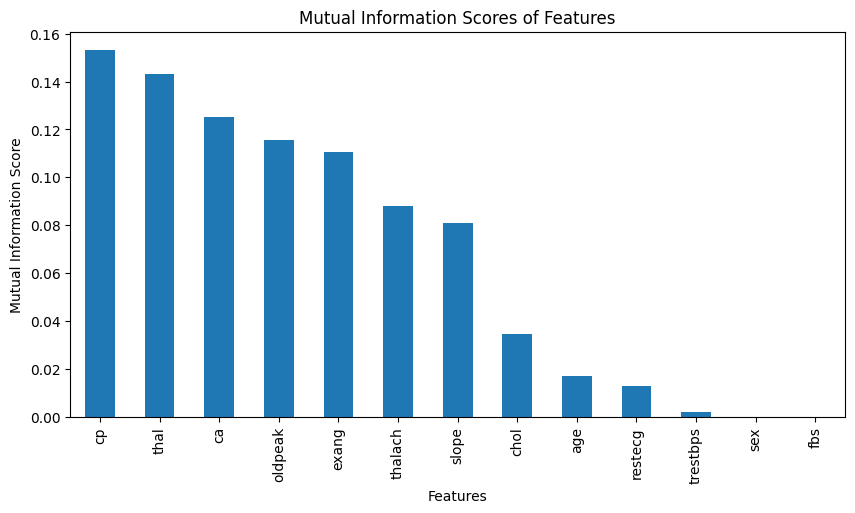

In [21]:
import matplotlib.pyplot as plt

# Create a bar plot of the mutual information scores
plt.figure(figsize=(10, 5))
mi_series.plot.bar()
plt.xlabel('Features')
plt.ylabel('Mutual Information Score')
plt.title('Mutual Information Scores of Features')
plt.show()

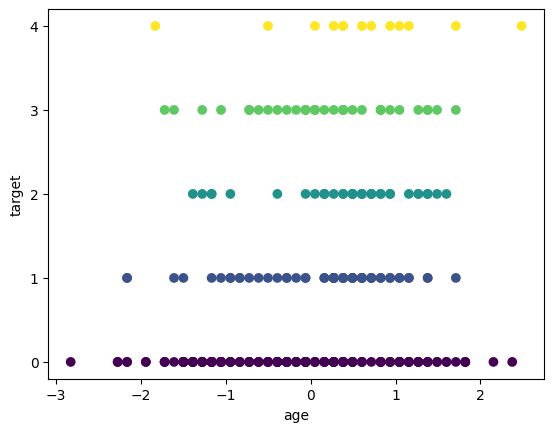

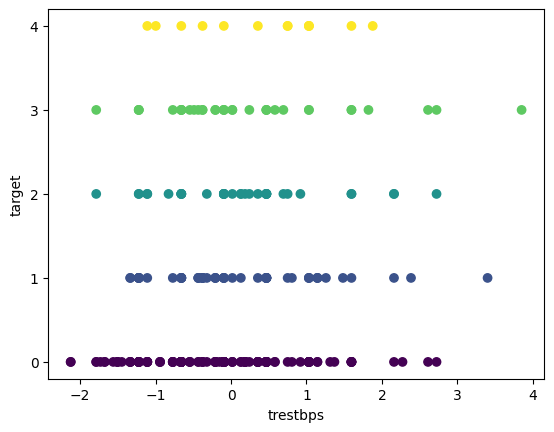

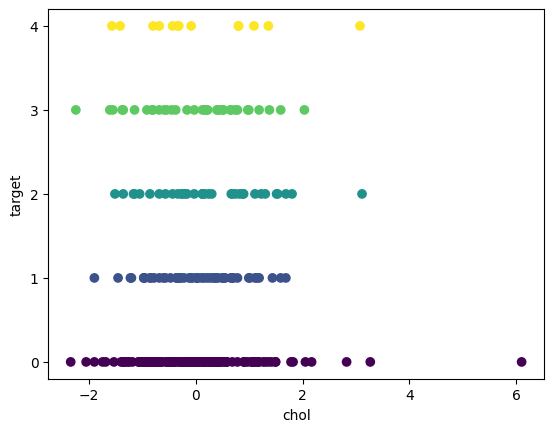

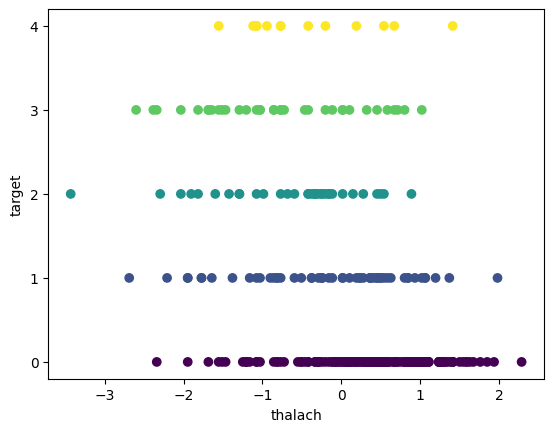

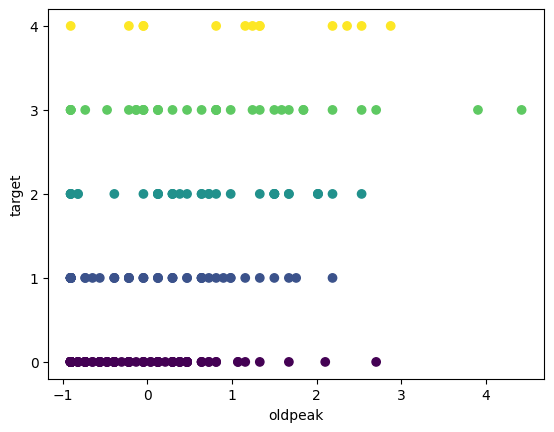

In [24]:
num_cols = X.select_dtypes(include='number').columns

# Create a scatter plot of each numerical feature against the target
for col in num_cols:
    fig, ax = plt.subplots()
    ax.scatter(X[col], y, c=y)
    ax.set_xlabel(col)
    ax.set_ylabel('target')
    ax.set_yticks(y.unique())
    plt.show()

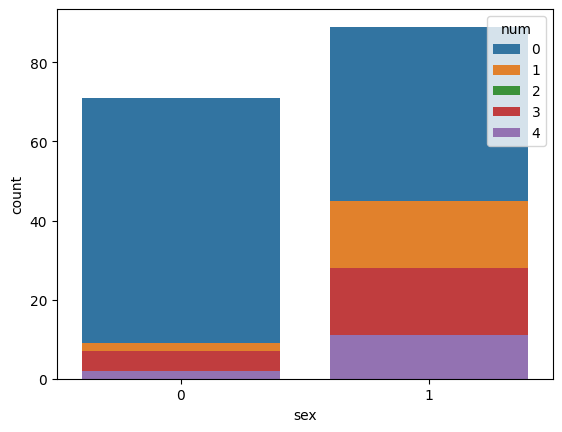

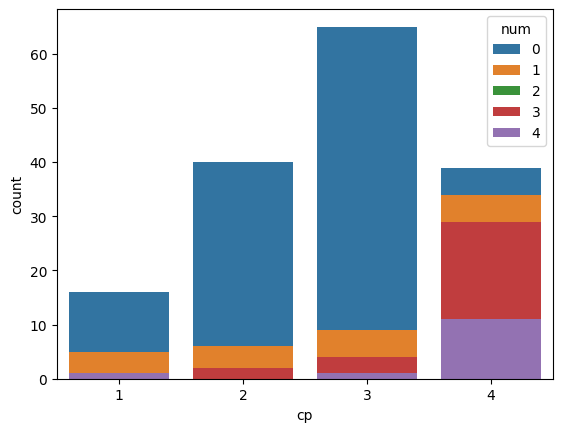

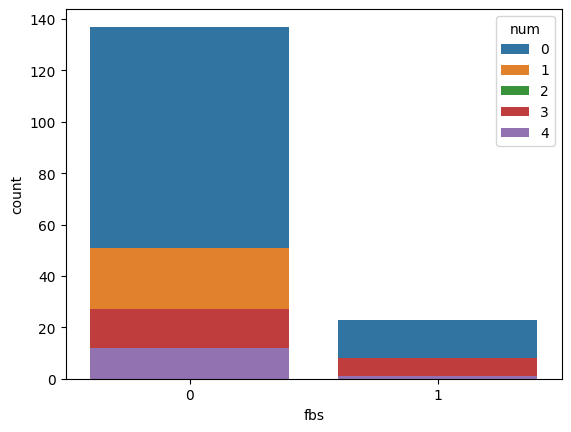

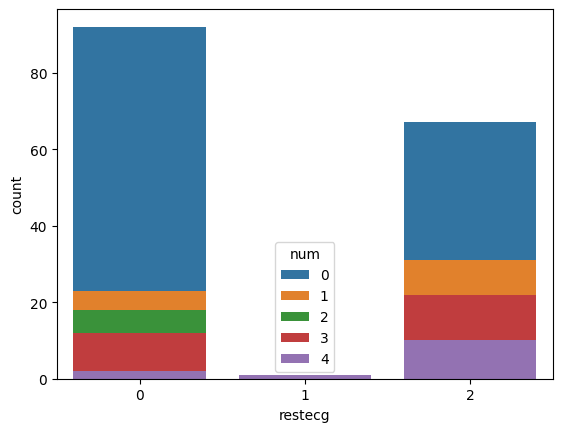

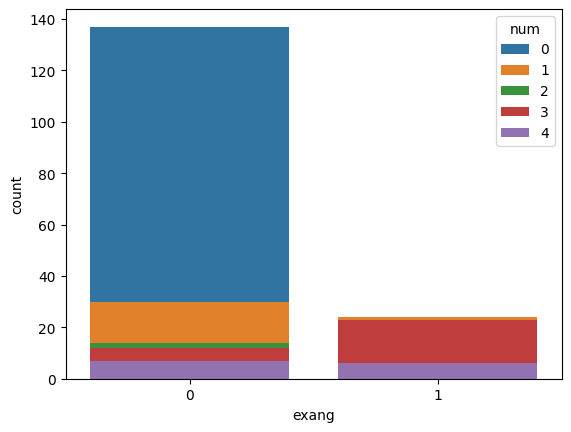

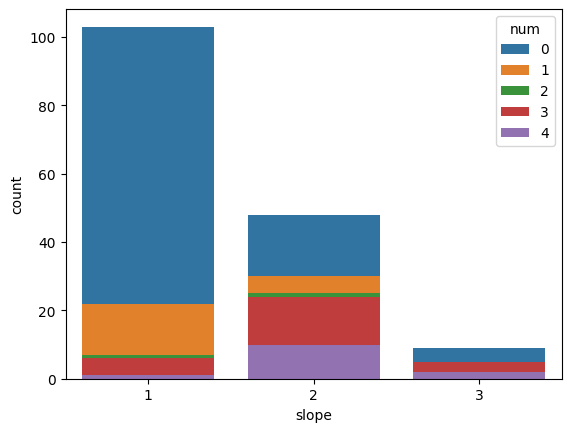

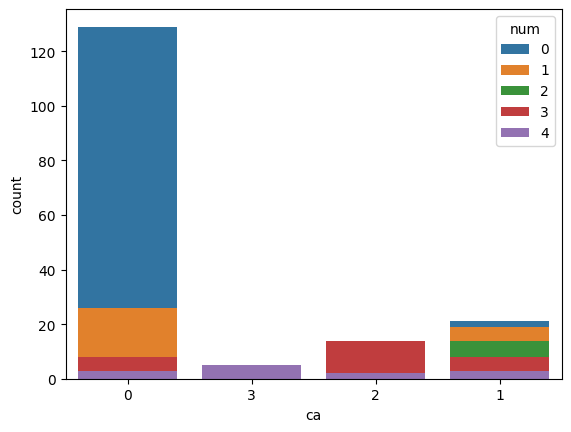

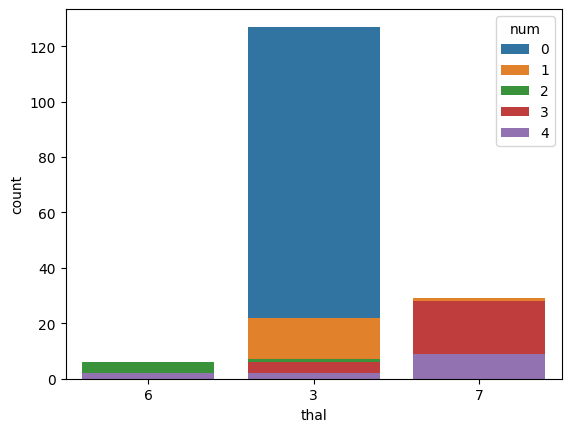

In [30]:
cat_cols = X.select_dtypes(include='object').columns

# Create a bar plot of each categorical feature against the target
for col in cat_cols:
    fig, ax = plt.subplots()
    sns.countplot(x=col, data=data, hue='num', dodge = False)
    ax.set_xlabel(col)
    ax.set_ylabel('count')
    plt.show()